In [55]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import ccdproc
from ccdproc import ImageFileCollection, CCDData

# WHT ISIS Long-slit Spectroscopy Reduction

The following reduction code works directly from the full set of images in a given nights observations. As observations are added during the evening, the ImageFileCollection object defined at the beginning needs to be refreshed.

Files can be rsync'd from the whtobs computer using the following command:

`$ rsync -av whtobs@taurus.ing.iac.es:/obsdata/whta/20170624/ 20170624/`

where 20170624/ is set to the relevant observation night.

In [105]:
ic1 = ImageFileCollection('20170624/')

## Create the bias frames



In [57]:
blue_bias_list = []
for filename in ic1.files_filtered(obstype='Bias', isiarm='Blue arm', object='blue bias'):
    print ic1.location + filename
    ccd = CCDData.read(ic1.location + filename, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    blue_bias_list.append(ccd)
master_bias_blue = ccdproc.combine(blue_bias_list, method='median')
master_bias_blue.write('master_bias_blue.fits', clobber=True)

red_bias_list = []
for filename in ic1.files_filtered(obstype='Bias', isiarm='Red arm', object='red bias'):
    print ic1.location + filename
    ccd = CCDData.read(ic1.location + filename, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    red_bias_list.append(ccd)
master_bias_red = ccdproc.combine(red_bias_list, method='median')
master_bias_red.write('master_bias_red.fits', clobber=True)

INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


20170624/r2544829.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544831.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544833.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


20170624/r2544835.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544837.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544839.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544841.fit

INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.



INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544843.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544845.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544847.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.


20170624/r2544849.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


20170624/r2544828.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544830.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544832.fit


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544834.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544836.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544838.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


20170624/r2544840.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544842.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544844.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544846.fit


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
20170624/r2544848.fit
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


## Create the flat fields

In [365]:
from astropy.convolution import convolve, Gaussian2DKernel
kernel = Gaussian2DKernel(25)

red_flat_list = []
for filename in ic1.files_filtered(obstype='Flat', isiarm='Red arm', object='well good flat r'):
    ccd = CCDData.read(ic1.location + filename, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_red)    
    red_flat_list.append(ccd)
    
master_flat_red = ccdproc.combine(red_flat_list, method='median')

convolved = convolve(master_flat_red.data, kernel, boundary='extend')

master_flat_red.write('master_flat_red.fits', clobber=True)

INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


<IPython.core.display.Javascript object>


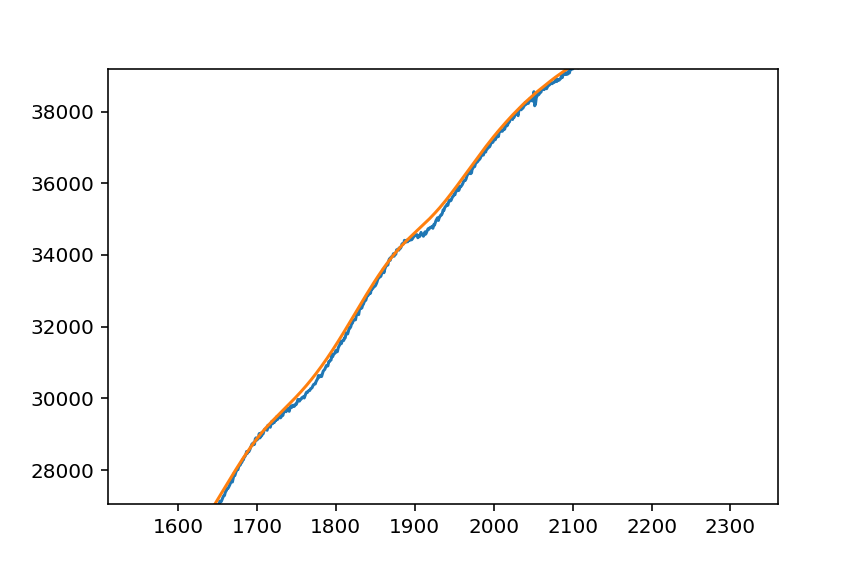

In [369]:
Fig, Ax = plt.subplots(1)
Ax.plot(np.arange(4096), np.median(ccd.data, axis=1))
Ax.plot(np.arange(4096), np.median(convolved, axis=1))

In [366]:
master_flat_red.data /= convolved
master_flat_red.write('master_flat_norm_red.fits', clobber=True)

In [299]:
blue_flat_list = []
for filename in ic1.files_filtered(obstype='Flat', isiarm='Blue arm', object='well good flat blu'):
    ccd = CCDData.read(ic1.location + filename, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_blue)
    blue_flat_list.append(ccd)
master_flat_blue = ccdproc.combine(blue_flat_list, method='median')
master_flat_blue.write('master_flat_blue.fits', clobber=True)

INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


INFO:astropy:first HDU with data is extension 1.
INFO:astropy:first HDU with data is extension 1.


INFO: first HDU with data is extension 1. [ccdproc.ccddata]
INFO: first HDU with data is extension 1. [ccdproc.ccddata]


In [355]:
x[3800]

3.5797835966168101

## Reduce arc frames

In [331]:
for filename in ic1.files_filtered(obstype='Arc', isiarm='Blue arm', object='CuNe+CuAr b tar'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_blue)
    #ccd = ccdproc.flat_correct(ccd, master_flat_blue)
    ccd.data = ccd.data.T
    ccd.write('arc_blue_'+filename, clobber=True)
    
for filename in ic1.files_filtered(obstype='Arc', isiarm='Red arm', object='CuNe+CuAr r tar'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_red)
    #ccd = ccdproc.flat_correct(ccd, master_flat_red)
    ccd.data = ccd.data.T
    ccd.write('arc_red_'+filename, clobber=True)

<IPython.core.display.Javascript object>


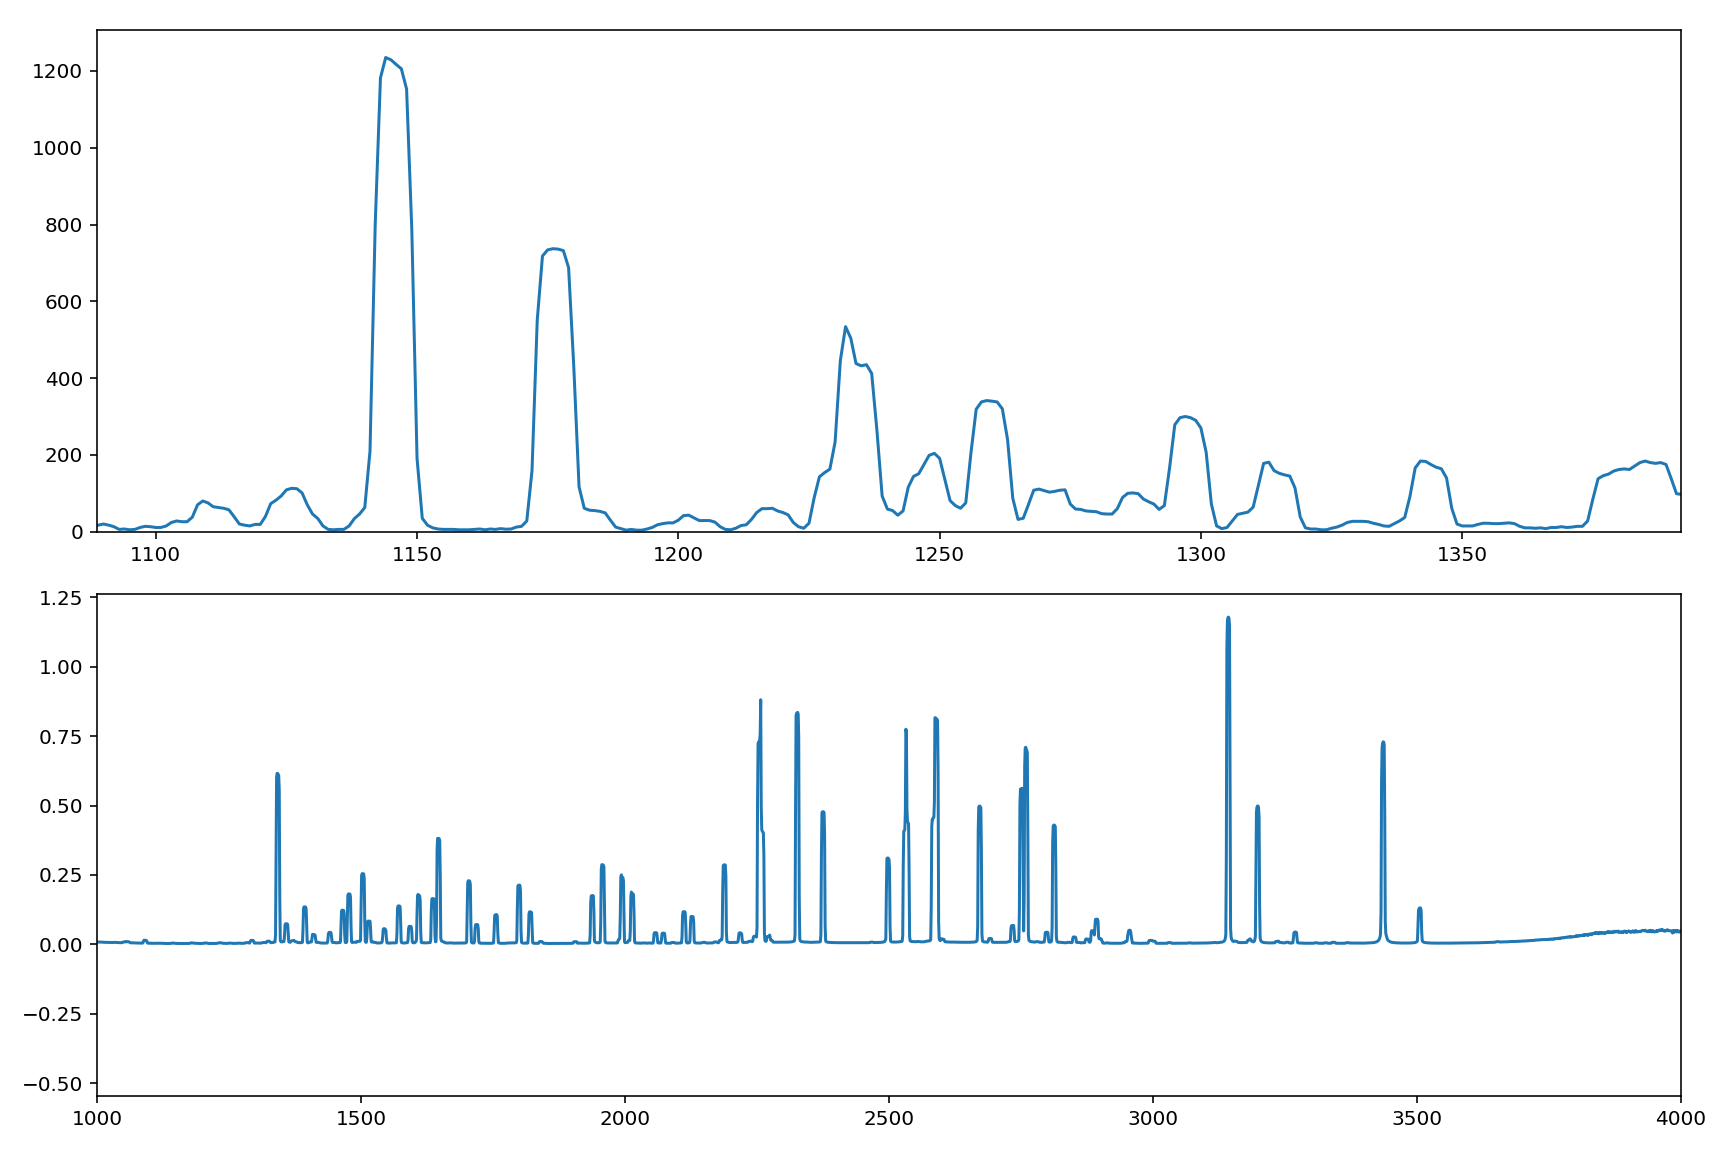

In [380]:
Fig, Ax = plt.subplots(2, 1, figsize=(12,8))

Ax[0].plot(np.arange(4099), np.median(CCDData.read('arc_blue_r2544941.fit'), axis=0))
Ax[0].set_xlim([1000,4000])
Ax[0].set_ylim([0, 2000])

Ax[1].plot(np.arange(4096), np.median(CCDData.read('arc_red_r2544942.fit').data/convolved.T, axis=0))
Ax[1].set_xlim([1000,4000])
#Ax[1].set_ylim([0, 30000])
Fig.tight_layout()

red_lines_pix = [1341, 1392, 1938, 1994, 2057, 2072, 2111, 2188,
                 2498, 2672, 2814, 
                 3143, 3199, 3270, 3437, 3505]
red_lines_w = [5852.49, 5944.83, 6929.47, 7032.41, 7147.04, 7173.94, 7245.17, 7383.98,
               7948.17, 8264.52, 8521.44,
               9122.97, 9224.5, 9354.22, 9657.78, 9784.5]

<IPython.core.display.Javascript object>


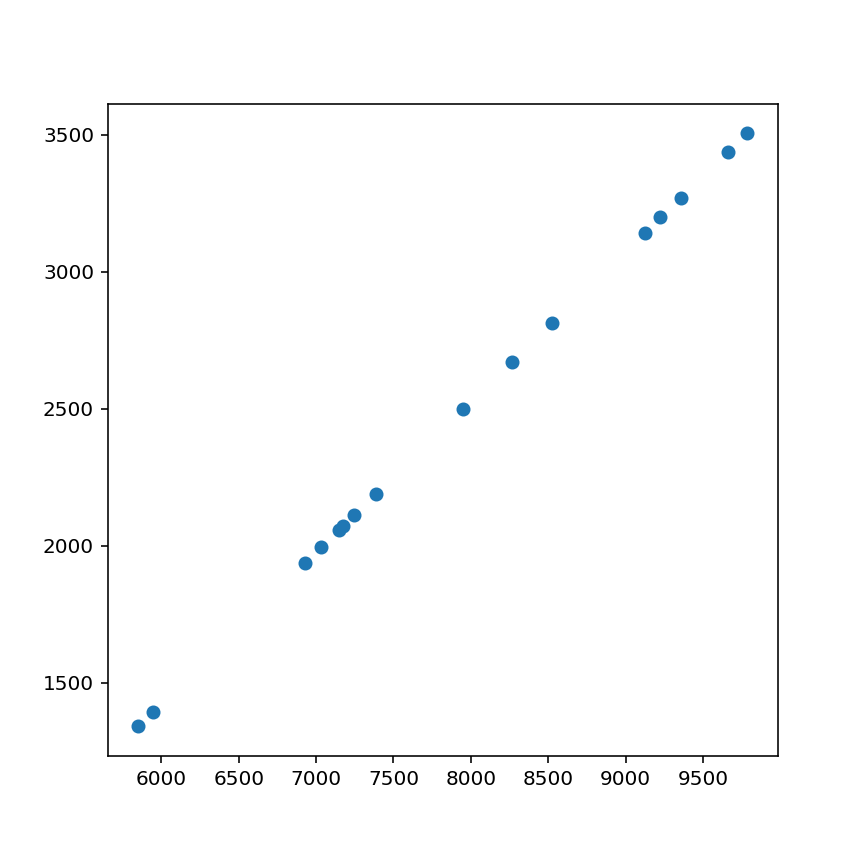

In [381]:
Fig, Ax = plt.subplots(1, 1, figsize=(6,6))

Ax.plot(red_lines_w, red_lines_pix, 'o')


## Reduce the object frames

In [172]:
ic1 = ImageFileCollection('20170624/')

blue_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Blue arm', object='USS422'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_blue)
    #ccd = ccdproc.flat_correct(ccd, master_flat_blue)
    ccd.data = ccd.data.T
    blue_target_list.append(ccd)
    #ccd.write('obj_'+filename, clobber=True)

blue_target = ccdproc.combine(blue_target_list, method='median')
blue_target.write('{0}_blue.fits'.format(blue_target_list[0].header['object']), clobber=True)

red_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Red arm', object='USS422'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_red)
    #ccd = ccdproc.flat_correct(ccd, master_flat_red)
    ccd.data = ccd.data.T
    #ccd.write('obj_'+filename, clobber=True)
    red_target_list.append(ccd)

red_target = ccdproc.combine(red_target_list, method='median')
red_target.write('{0}_red.fits'.format(red_target_list[0].header['object']), clobber=True)



In [253]:
ic1 = ImageFileCollection('20170624/')

blue_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Blue arm', object='USS337'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.cosmicray_lacosmic(ccd, sigclip=6, gain=ccd.header['GAIN'], readnoise=ccd.header['READNOIS'])
    ccd = ccdproc.subtract_bias(ccd, master_bias_blue)
    #ccd = ccdproc.flat_correct(ccd, master_flat_blue)
    ccd.data = ccd.data.T
    ccd.mask = ccd.mask.T
    blue_target_list.append(ccd)
    #ccd.write('obj_'+filename, clobber=True)

blue_target = ccdproc.combine(blue_target_list, method='median')
blue_target.write('{0}_blue.fits'.format(blue_target_list[0].header['object']), clobber=True)

red_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Red arm', object='USS337'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.cosmicray_lacosmic(ccd, sigclip=6, gain=ccd.header['GAIN'], readnoise=ccd.header['READNOIS'])
    ccd = ccdproc.subtract_bias(ccd, master_bias_red)
    #ccd = ccdproc.flat_correct(ccd, master_flat_red)
    ccd.data = ccd.data.T
    ccd.mask = ccd.mask.T
    #ccd.write('obj_'+filename, clobber=True)
    red_target_list.append(ccd)

red_target = ccdproc.combine(red_target_list, method='median')
red_target.write('{0}_red.fits'.format(red_target_list[0].header['object']), clobber=True)




In [268]:
ic1 = ImageFileCollection('20170624/')

blue_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Blue arm', object='USS7'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.cosmicray_lacosmic(ccd, sigclip=6, gain=ccd.header['GAIN'], readnoise=ccd.header['READNOIS'])
    ccd = ccdproc.subtract_bias(ccd, master_bias_blue)
    #ccd = ccdproc.flat_correct(ccd, master_flat_blue)
    ccd.data = ccd.data.T
    ccd.mask = ccd.mask.T
    blue_target_list.append(ccd)
    #ccd.write('obj_'+filename, clobber=True)

blue_target = ccdproc.combine(blue_target_list, method='median')
blue_target.write('{0}_blue.fits'.format(blue_target_list[0].header['object']), clobber=True)

red_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Red arm', object='USS7'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.cosmicray_lacosmic(ccd, sigclip=6, gain=ccd.header['GAIN'], readnoise=ccd.header['READNOIS'])
    ccd = ccdproc.subtract_bias(ccd, master_bias_red)
    #ccd = ccdproc.flat_correct(ccd, master_flat_red)
    ccd.data = ccd.data.T
    ccd.mask = ccd.mask.T
    #ccd.write('obj_'+filename, clobber=True)
    red_target_list.append(ccd)

red_target = ccdproc.combine(red_target_list, method='median')
red_target.write('{0}_red.fits'.format(red_target_list[0].header['object']), clobber=True)





In [251]:
for c in blue_target_list:
    print(c.data.shape)
    print(c.mask.shape)

(966, 4099)
(4099, 966)
(966, 4099)
(4099, 966)
(966, 4099)
(4099, 966)
(966, 4099)
(4099, 966)
(966, 4099)
(4099, 966)


In [233]:
ic1 = ImageFileCollection('20170624/')

blue_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Blue arm', object='SP1446+259'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_blue)
    #ccd = ccdproc.flat_correct(ccd, master_flat_blue)
    ccd.data = ccd.data.T
    blue_target_list.append(ccd)
    #ccd.write('obj_'+filename, clobber=True)

blue_target = ccdproc.combine(blue_target_list, method='median')
blue_target.write('{0}_blue.fits'.format(blue_target_list[0].header['object']), clobber=True)

red_target_list = []
for filename in ic1.files_filtered(obstype='TARGET', isiarm='Red arm', object='SP1446+259'):
    hdu = fits.open(ic1.location + filename)
    ccd = CCDData(hdu[1].data, header=hdu[0].header+hdu[1].header, unit = u.adu)
    #this has to be fixed as the bias section does not include the whole section that will be trimmed
    #ccd = ccdproc.subtract_overscan(ccd, median=True,  overscan_axis=0, fits_section='[1:966,4105:4190]')
    ccd = ccdproc.trim_image(ccd, fits_section=ccd.header['TRIMSEC'] )
    ccd = ccdproc.subtract_bias(ccd, master_bias_red)
    #ccd = ccdproc.flat_correct(ccd, master_flat_red)
    ccd.data = ccd.data.T
    #ccd.write('obj_'+filename, clobber=True)
    red_target_list.append(ccd)

red_target = ccdproc.combine(red_target_list, method='median')
red_target.write('{0}_red.fits'.format(red_target_list[0].header['object']), clobber=True)





TypeError: Only dimensionless scalar quantities can be converted to Python scalars

<IPython.core.display.Javascript object>


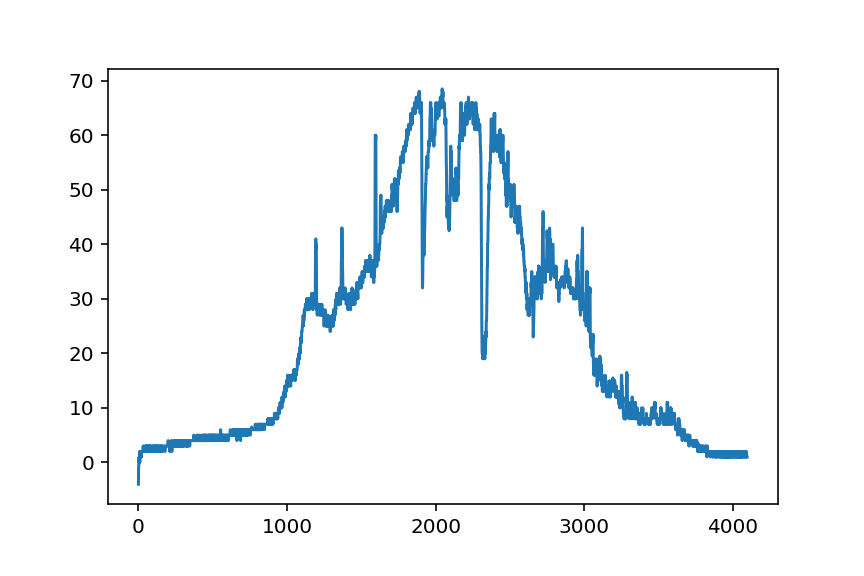

In [184]:
%matplotlib notebook
plt.plot(np.arange(4096), np.median(red_target, axis=0))
plt.show()

In [271]:
def get_1d_spectra(ccd, source_pos, source_width=10, sky_pos=[435,531], sky_width=30):
    source_median_raw = np.nanmedian(ccd[source_pos-(source_width/2):source_pos+(source_width/2), :], axis=0)
    
    sky_a = np.nanmedian(ccd[sky_pos[0]-(sky_width/2):sky_pos[0]+(sky_width/2), :], axis=0)
    sky_b = np.nanmedian(ccd[sky_pos[1]-(sky_width/2):sky_pos[1]+(sky_width/2), :], axis=0)
    
    source_median = source_median_raw- 0.5*(sky_a+sky_b)
    return source_median

In [281]:
test_red = get_1d_spectra(red_target, 532, sky_pos=[100,450])
test_blue = get_1d_spectra(blue_target, 815, sky_pos=[100,450])

<IPython.core.display.Javascript object>


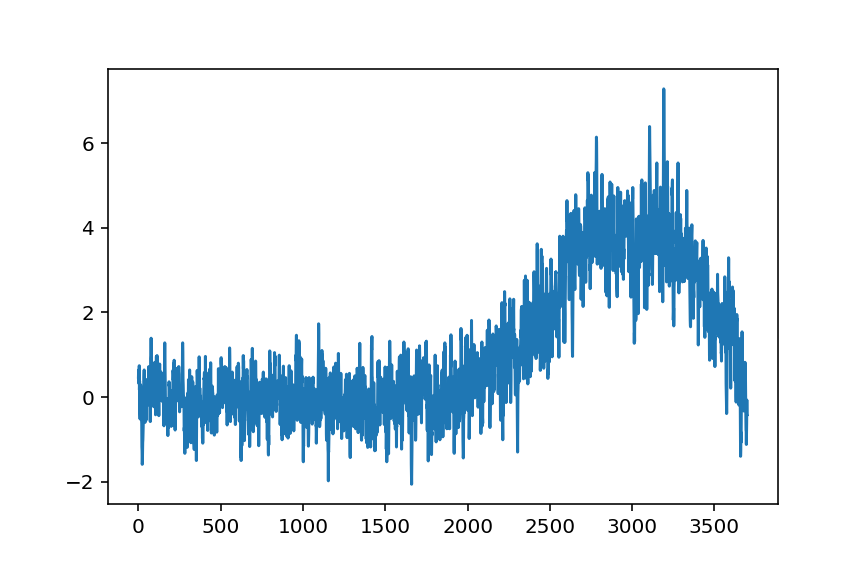

In [283]:
%matplotlib notebook
from astropy.convolution import convolve, Box1DKernel

k = Box1DKernel(5)
plt.plot(np.arange(4099)[:3700], convolve(test_blue,k)[:3700])
plt.show()

In [123]:
966*0.55

531.3000000000001

In [97]:
source_pos = 483
source_width = 100
a = ccd[source_pos-(source_width/2):source_pos+(source_width/2), :]

In [99]:
ccd

CCDData([[  2.41027261e+04,  -1.18309113e+03,   0.00000000e+00, ...,
           -2.69712392e+03,  -4.87995335e+02,  -4.63440156e+03],
         [ -5.37950647e+05,   4.60075602e+04,  -1.11726178e+05, ...,
            7.38586891e+04,   1.35563209e+05,   9.38374364e+04],
         [  6.92953376e+04,   0.00000000e+00,   0.00000000e+00, ...,
           -2.52902692e+02,   4.74625600e+02,  -2.60508788e+02],
         ..., 
         [  0.00000000e+00,   9.36423482e+02,   1.33260265e+03, ...,
            0.00000000e+00,   4.77898880e+02,   6.57867130e+02],
         [ -1.73238344e+04,  -2.16547930e+03,   3.22303896e+03, ...,
           -2.37312800e+02,  -2.66520529e+02,  -2.34105870e+02],
         [ -3.14978807e+03,  -2.98686800e+03,   1.99890397e+03, ...,
            4.81217623e+02,   7.58708076e+02,  -2.62482340e+02]])